### Data Preparation

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (make sure to replace 'your_data.csv' with your actual file)
df = pd.read_csv('..\dataset\S&P500_stock_5y.csv')
df = df.dropna()


# Parse the 'Date' column into datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the data by date
df = df.sort_values('date')


# Feature selection: Open, High, Low, Volume as input, Close as target
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature scaling (optional but can help with gradient-based optimizers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


d:\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\ml\venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relati

619029    83.159072
619030    83.512748
619031    83.251897
619032    82.347281
619033    82.932323
619034    83.042492
619035    83.041726
619036    83.036336
619037    83.033284
619038    83.041574
619039    83.042906
dtype: float64


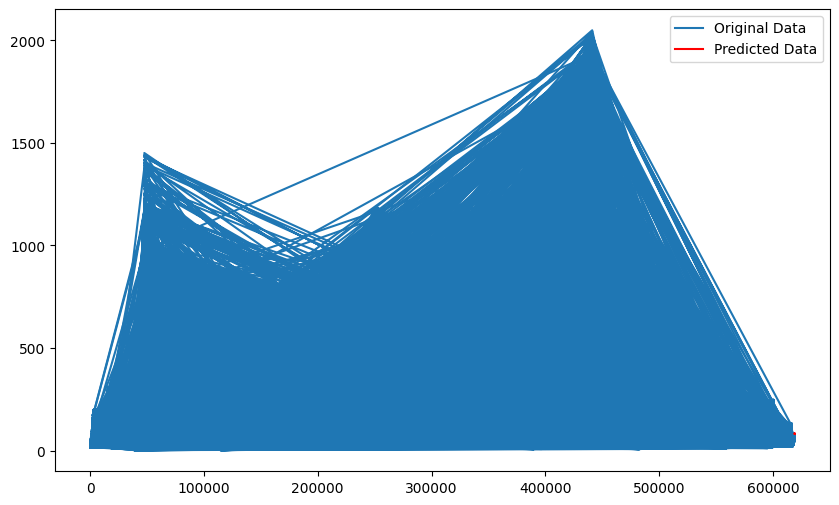

In [31]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load your dataset

# Select the close prices for autoregression
close_prices = df['close']

# Fit autoregression model with lag of 5
model = AutoReg(close_prices, lags=5)
model_fit = model.fit()

# Make predictions (e.g., next 10 days)
predictions = model_fit.predict(start=len(close_prices), end=len(close_prices) + 10)
print(predictions)

plt.rcParams['agg.path.chunksize'] = 10000  # Adjust this value as needed

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(close_prices, label='Original Data')
plt.plot(predictions, label='Predicted Data', color='red')
plt.legend()
plt.show()


Mean Squared Error: 0.47386115443299776


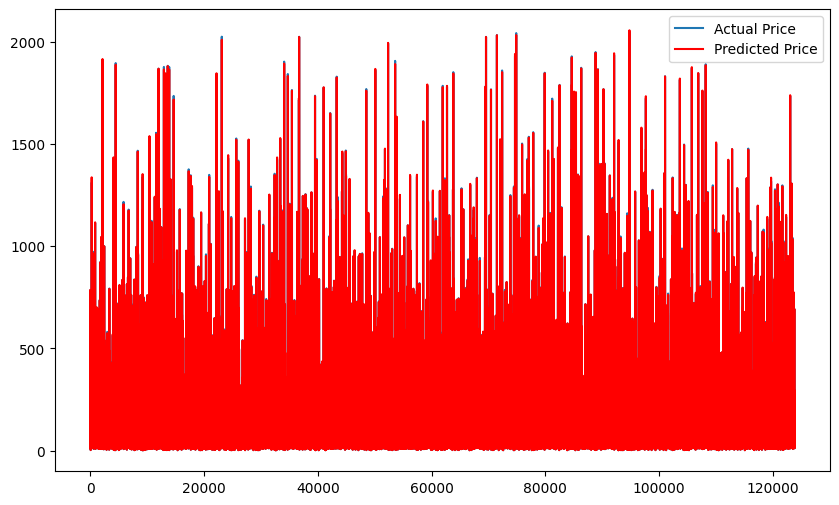

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection: using Open, High, Low, Volume to predict Close
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.legend()
plt.show()


### Feature selection
1. Correlation Matrix


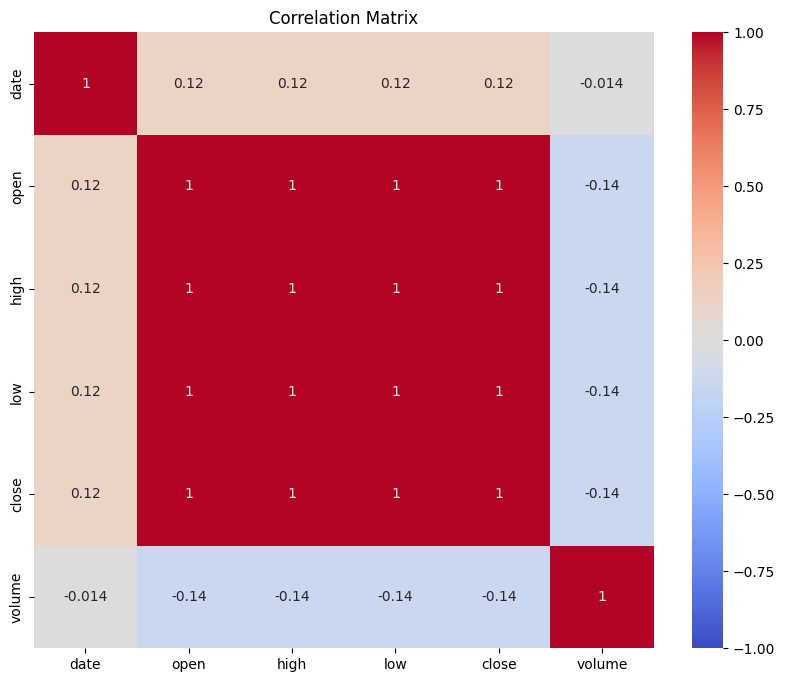

close     1.000000
low       0.999939
high      0.999936
open      0.999872
date      0.119074
volume   -0.142802
Name: close, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Get correlations of each feature with the target variable 'Close'
corr_target = corr_matrix['close'].sort_values(ascending=False)
print(corr_target)


### Multiple Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5869125435844144


### Autoregression (AR)

In [14]:
from statsmodels.tsa.ar_model import AutoReg

# Use the Close prices (shifted by 1, 2, etc.) as input for autoregression
train_data = df['close'][:int(0.8 * len(df))]
test_data = df['close'][int(0.8 * len(df)):]

# Train the AR model
ar_model = AutoReg(train_data, lags=5)
ar_model_fitted = ar_model.fit()

# Make predictions
y_pred_ar = ar_model_fitted.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Evaluate
mse_ar = mean_squared_error(test_data, y_pred_ar)
print(f'Autoregression Mean Squared Error: {mse_ar}')


d:\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\ml\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\ml\venv\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relati

Autoregression Mean Squared Error: 16771.719920947624


### Evaluation

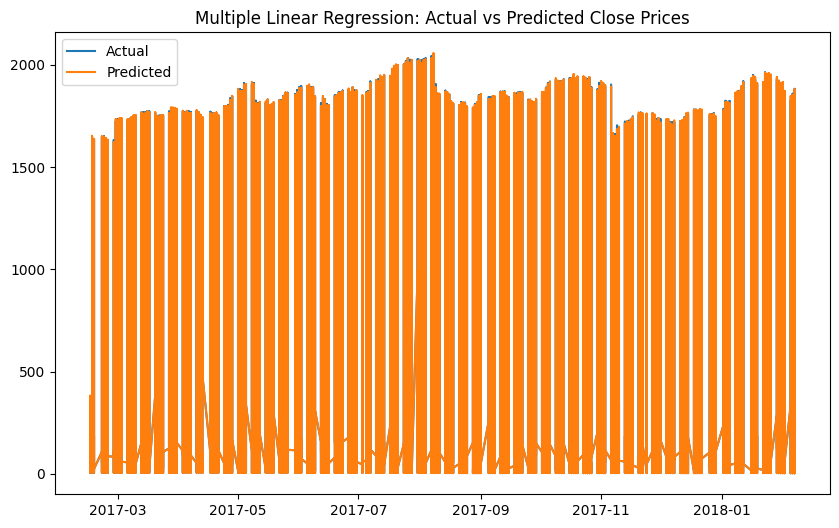

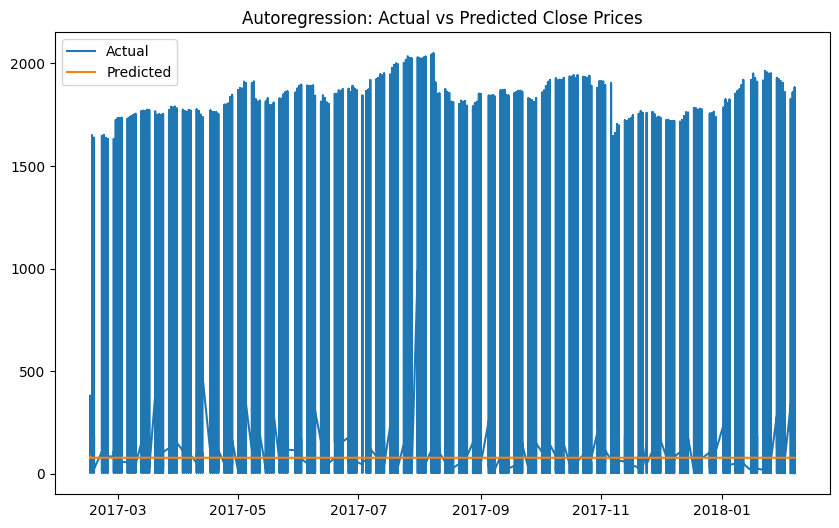

In [23]:
import matplotlib.pyplot as plt

# Plot for Multiple Linear Regression
plt.figure(figsize=(10,6))
plt.plot(df['date'][-len(y_test):], y_test, label='Actual')
plt.plot(df['date'][-len(y_test):], y_pred, label='Predicted')
plt.title('Multiple Linear Regression: Actual vs Predicted Close Prices')
plt.legend()
plt.show()

# Plot for Autoregression
plt.figure(figsize=(10,6))
plt.plot(df['date'][-len(test_data):], test_data, label='Actual')
plt.plot(df['date'][-len(test_data):], y_pred_ar, label='Predicted')
plt.title('Autoregression: Actual vs Predicted Close Prices')
plt.legend()
plt.show()


### 預測漏斗圖

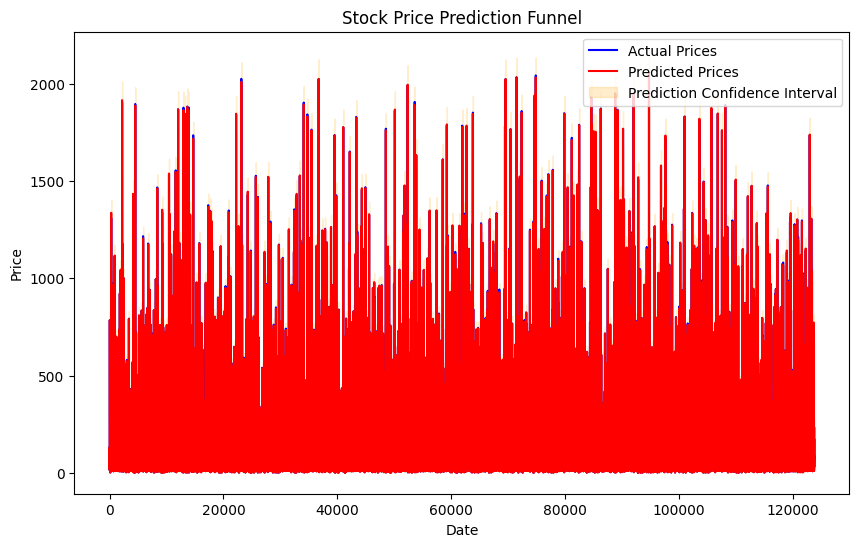

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for actual and predicted prices
dates = np.arange(1, len(y_test) + 1)
actual = y_test.values
predicted = y_pred

# Calculate upper and lower bounds for the funnel (e.g., based on error margins)
upper_bound = predicted + (predicted * 0.05)  # Assuming 5% error margin
lower_bound = predicted - (predicted * 0.05)

# Create the funnel plot
plt.figure(figsize=(10, 6))
plt.plot(dates, actual, label='Actual Prices', color='blue')
plt.plot(dates, predicted, label='Predicted Prices', color='red')

# Fill the area between the upper and lower bounds to simulate the funnel
plt.fill_between(dates, lower_bound, upper_bound, color='orange', alpha=0.2, label='Prediction Confidence Interval')

plt.title('Stock Price Prediction Funnel')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
